In [7]:
# Import the dependencies
import numpy as np
from scipy.linalg import toeplitz, cholesky, sqrtm, inv
# import scipy.linalg as la
from scipy import signal
from scipy.integrate import odeint
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
print("Imports done")


Imports done


[4.         3.98656987 4.01877439 ... 0.97944064 0.98039224 0.9804183 ]


1.0036597476559872

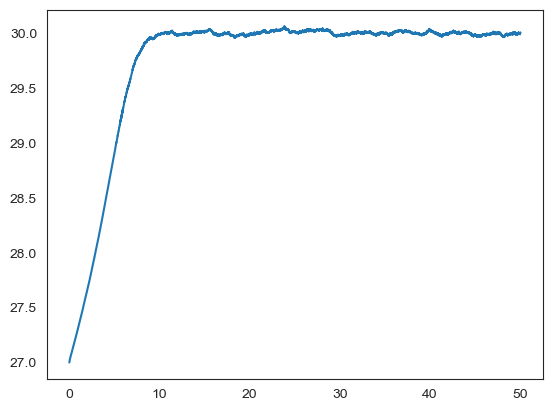

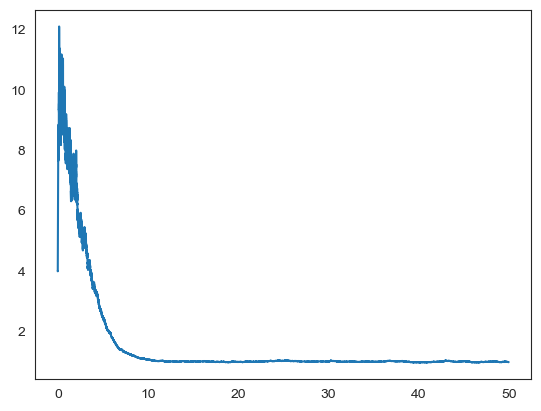

In [10]:
from statistics import mean, variance, pstdev
# Setting up the time data:
dt = 0.0005; # integration step, average neuron resets 200 times per second
T = 50+dt; # maximum time considered
t = np.arange(0,T,dt)
N= t.size #Amount of data points
v = 30
std_noise = 1
x = np.zeros(N)
mu = np.zeros(N)
e = np.zeros(N)

Sigma = np.zeros(N)
Sigma[0] = 4
mu[0]= 27
std = np.zeros(N)

for i in np.arange(0,N-1):
    x[i] = v + np.random.randn(1)*std_noise

    e[i] = x[i] - mu[i]
    
    omega = 1/Sigma[i]
    domega = 0.5*(Sigma[i] - e[i]**2)
    omega = omega + dt*domega
    Sigma[i+1] = 1/omega
    # var[i+1] = Sigma[i+1]**2
    dmu = 1/Sigma[i]*e[i] #EVEN EXPERIMENTEREN MET SIGMA_REAL OF SIGMA[I]
    
    mu[i+1] = mu[i] + dt*dmu
    


plt.plot(t,mu)
plt.figure()
plt.plot(t,Sigma)
print(Sigma)
#print(std)
variance(x)



[5.         5.01702782 4.98807938 ... 3.71132205 3.71997019 3.7160219 ]
[4 4 4 ... 4 4 4]


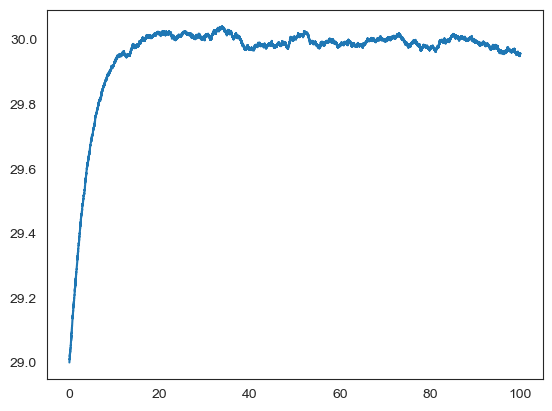

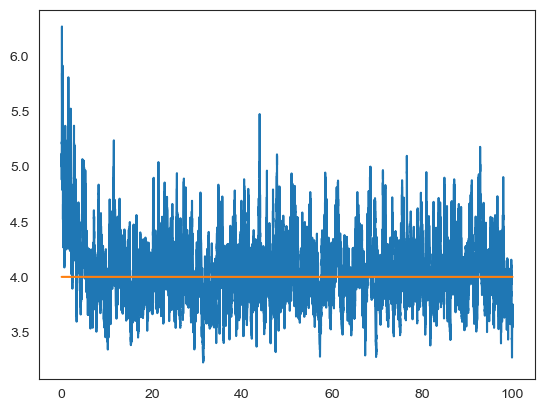

In [13]:
from statistics import mean, variance, pstdev
# Setting up the time data:
dt = 0.0005; # integration step, average neuron resets 200 times per second
T = 100+dt; # maximum time considered
t = np.arange(0,T,dt)
N= t.size #Amount of data points
v = 30
std_noise = 2
variantie = 1

x = np.zeros(N)
mu = np.zeros(N)
e = np.zeros(N)
var = np.full((N), std_noise**2)
omega = np.zeros(N)
sigma = np.zeros(N)
omega[0] = 0.2
mu[0]= 29
std = np.zeros(N)

for i in np.arange(0,N-1):
    x[i] = v + np.random.randn(1)*std_noise
    sigma[i] = 1/omega[i]
    
    e[i] = x[i] - mu[i]
    
    domega = 0.5*(1/omega[i] - e[i]**2)
    omega[i+1] = omega[i] + dt*domega
   
    dmu = omega[i]*e[i]
    
    mu[i+1] = mu[i] + dt*dmu
    sigma[i+1] =1/ omega[i+1]


plt.plot(t,mu)
plt.figure()
plt.plot(t,sigma)
plt.plot(t,var)

print(sigma)
variance(x)

print(var)